In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [5]:
y_train = np.array([4, 0, 3, 2])
print(y_train)
print('y_train.shape:',y_train.shape)
Y_train = np_utils.to_categorical(y_train)
print(Y_train)
Y_train.shape
print('Y_train.shape:',Y_train.shape)

[4 0 3 2]
y_train.shape: (4,)
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
Y_train.shape: (4, 5)


In [24]:
import keras
from keras.datasets import mnist
import cv2

(x_train,y_train),(x_test,y_test)=mnist.load_data()
xtrain=[]
xtest=[]

for n in range(0,60000):
  xtrain1 = cv2.resize(x_train[n],(7,7))
  xtrain.append(xtrain1)
for n in range(0,10000):
  xtest1 = cv2.resize(x_test[n],(7,7))
  xtest.append(xtest1)

xtrain = np.array(xtrain)
xtest = np.array(xtest)
# resize from 28*28 to 7*7

print('xtrain.shape:',xtrain.shape)
print('y_train.shape:',y_train.shape)
print('xtest.shape:',y_train.shape)
print('y_test.shape:',y_train.shape)


aa=xtrain[0]
print('shape of xtrain[0]:',aa.shape)

print('xtrain[0]:')
print(xtrain[0]) 
print('y_train[0:4]:') 
y_train[0:4]


xtrain.shape: (60000, 7, 7)
y_train.shape: (60000,)
xtest.shape: (60000,)
y_test.shape: (60000,)
shape of xtrain[0]: (7, 7)
xtrain[0]:
[[  0   0   0   0   0   0   0]
 [  0   0  33 136 197 235   0]
 [  0   0  70  77  39   0   0]
 [  0   0   0 197  36   0   0]
 [  0   0   0  12 252   0   0]
 [  0   5 196 195   1   0   0]
 [  0   0   0   0   0   0   0]]
y_train[0:4]:


array([5, 0, 4, 1], dtype=uint8)

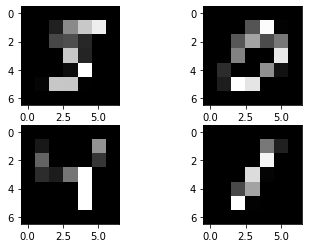

In [25]:
plt.subplot(221)
plt.imshow(xtrain[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(xtrain[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(xtrain[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(xtrain[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

xtrain shape: (60000, 7, 7)
60000 train samples
10000 test samples
xtrain[0]:
[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.12941177 0.53333336 0.77254903 0.92156863
  0.        ]
 [0.         0.         0.27450982 0.3019608  0.15294118 0.
  0.        ]
 [0.         0.         0.         0.77254903 0.14117648 0.
  0.        ]
 [0.         0.         0.         0.04705882 0.9882353  0.
  0.        ]
 [0.         0.01960784 0.76862746 0.7647059  0.00392157 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


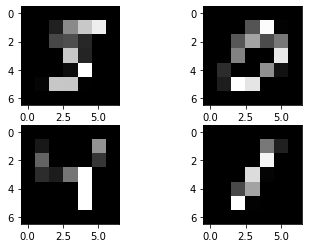

In [26]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain/= 255
xtest/= 255
print('xtrain shape:', xtrain.shape)
print(xtrain.shape[0], 'train samples') 
print(xtest.shape[0], 'test samples') 
print('xtrain[0]:')
print(xtrain[0])

plt.subplot(221)
plt.imshow(xtrain[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(xtrain[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(xtrain[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(xtrain[3], cmap=plt.get_cmap('gray'))

plt.show()


In [27]:
seed = 7
np.random.seed(seed)

X_train = xtrain.reshape(xtrain.shape[0], 1, 7, 7).astype('float32')
X_test = xtest.reshape(xtest.shape[0], 1, 7, 7).astype('float32')
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('original label')
print(y_train)
print('y_train.shape:',y_train.shape)

Y_train = np_utils.to_categorical(y_train)
print('new label')
print(Y_train)
Y_train.shape
print('Y_train.shape:',Y_train.shape)

Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]


X_train.shape: (60000, 1, 7, 7)
X_test.shape: (10000, 1, 7, 7)
original label
[5 0 4 ... 5 6 8]
y_train.shape: (60000,)
new label
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Y_train.shape: (60000, 10)


X_train.shape before reshape (60000, 7, 7)
X_train.shape after reshape (60000, 49)
Epoch 1/25
300/300 - 4s - loss: 0.5829 - accuracy: 0.8235 - val_loss: 0.3519 - val_accuracy: 0.8922 - 4s/epoch - 14ms/step
Epoch 2/25
300/300 - 4s - loss: 0.3266 - accuracy: 0.8942 - val_loss: 0.2757 - val_accuracy: 0.9117 - 4s/epoch - 12ms/step
Epoch 3/25
300/300 - 4s - loss: 0.2695 - accuracy: 0.9125 - val_loss: 0.2502 - val_accuracy: 0.9202 - 4s/epoch - 12ms/step
Epoch 4/25
300/300 - 4s - loss: 0.2374 - accuracy: 0.9227 - val_loss: 0.2292 - val_accuracy: 0.9246 - 4s/epoch - 12ms/step
Epoch 5/25
300/300 - 4s - loss: 0.2177 - accuracy: 0.9279 - val_loss: 0.2155 - val_accuracy: 0.9298 - 4s/epoch - 12ms/step
Epoch 6/25
300/300 - 4s - loss: 0.2012 - accuracy: 0.9343 - val_loss: 0.2141 - val_accuracy: 0.9298 - 4s/epoch - 12ms/step
Epoch 7/25
300/300 - 4s - loss: 0.1883 - accuracy: 0.9376 - val_loss: 0.2011 - val_accuracy: 0.9341 - 4s/epoch - 12ms/step
Epoch 8/25
300/300 - 4s - loss: 0.1758 - accuracy: 0.941

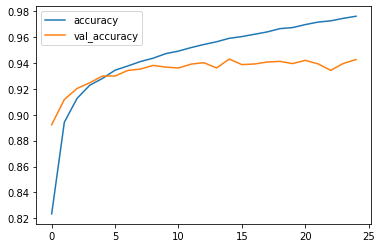

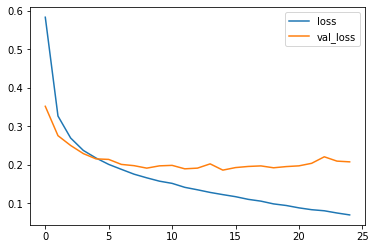

In [33]:
from keras.datasets import mnist
import cv2

(x_train,y_train),(x_test,y_test)=mnist.load_data()
X_train=[]
X_test=[]

for n in range(0,60000):
  xtrain1 = cv2.resize(x_train[n],(7,7))
  X_train.append(xtrain1)
for n in range(0,10000):
  xtest1 = cv2.resize(x_test[n],(7,7))
  X_test.append(xtest1)

X_train = np.array(X_train)
X_test = np.array(X_test)
# resize the image from 28*28 to 7*7

seed = 7
np.random.seed(seed)

print('X_train.shape before reshape' , X_train.shape)
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print('X_train.shape after reshape' , X_train.shape)

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_hidden_nodes1 = 550  
num_hidden_nodes2 = 600


def baseline_model():
    
    model = Sequential()
    model.add(Dense(num_hidden_nodes1, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_hidden_nodes2, input_dim=num_hidden_nodes1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

model = baseline_model()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()